In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml

In [32]:
dat = pd.read_csv('~/Documents/PhD/Projects/10-ELECSIM/elecsim/data/external/electricity_demand/gridwatch-all.csv')
dat.head()


,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,...,solar,ocgt,french_ict,dutch_ict,irish_ict,ew_ict,nemo,other,north_south,scotland_england
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,309,636,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,332,633,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,285,634,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,287,635,...,0.0,0,900,0.0,-414,0.0,0,0,0,0
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,297,637,...,0.0,0,900,0.0,-414,0.0,0,0,0,0


In [33]:
dat.columns = dat.columns.str.replace(" ", "")
dat.columns

Index(['id', 'timestamp', 'demand', 'frequency', 'coal', 'nuclear', 'ccgt',
       'wind', 'pumped', 'hydro', 'biomass', 'oil', 'solar', 'ocgt',
       'french_ict', 'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other',
       'north_south', 'scotland_england'],
      dtype='object')

In [34]:
dat.timestamp = pd.to_datetime(dat.timestamp)
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,...,solar,ocgt,french_ict,dutch_ict,irish_ict,ew_ict,nemo,other,north_south,scotland_england
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,309,636,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,332,633,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,285,634,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,287,635,...,0.0,0,900,0.0,-414,0.0,0,0,0,0
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,297,637,...,0.0,0,900,0.0,-414,0.0,0,0,0,0


In [35]:
dat = dat.drop(columns=['pumped', 'french_ict', 'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other', 'north_south', 'scotland_england'])
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,hydro,biomass,oil,solar,ocgt
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,636,0,0,0.0,0
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,633,0,0,0.0,0
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,634,0,0,0.0,0
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,635,0,0,0.0,0
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,637,0,0,0.0,0


In [36]:
dat['year'] = dat.timestamp.dt.year
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,hydro,biomass,oil,solar,ocgt,year
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,636,0,0,0.0,0,2011
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,633,0,0,0.0,0,2011
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,634,0,0,0.0,0,2011
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,635,0,0,0.0,0,2011
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,637,0,0,0.0,0,2011


In [37]:
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,hydro,biomass,oil,solar,ocgt,year
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,636,0,0,0.0,0,2011
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,633,0,0,0.0,0,2011
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,634,0,0,0.0,0,2011
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,635,0,0,0.0,0,2011
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,637,0,0,0.0,0,2011


In [38]:
mean_dat = dat.groupby('year').mean()
mean_dat.head()

,id,demand,frequency,coal,nuclear,ccgt,wind,hydro,biomass,oil,solar,ocgt
year,,,,,,,,,,,,
2011,31348.500000,35117.011533,49.973152,11243.906907,6734.439815,14000.322492,1219.795135,466.658941,0.000000,1.184511,0.0,3.624214
2012,115321.270562,36554.332260,49.993865,15630.434915,7514.328127,9455.295672,1435.485117,372.808940,237.981436,2.305990,0.0,2.939490
2013,220313.500000,36247.977351,49.999951,14355.798134,7526.513864,9135.930888,2127.126709,332.950624,439.390879,0.866817,0.0,0.822531
2014,325101.000000,34421.810161,49.845724,11025.881341,6821.166719,9876.204078,2416.926159,447.842094,852.327038,0.577146,0.0,0.726249
2015,429962.000000,33028.107509,49.967928,8506.284996,7501.486303,9630.220892,2670.218641,467.429302,1288.407380,0.297364,0.0,0.740043


In [39]:
demand_data = mean_dat[['demand']]
demand_data

,demand
year,
2011,35117.011533
2012,36554.332260
2013,36247.977351
2014,34421.810161
2015,33028.107509
2016,32340.488623
2017,31832.251764
2018,31425.092353
2019,30894.578023


In [40]:
1+demand_data.demand.pct_change()

year
2011         NaN
2012    1.040929
2013    0.991619
2014    0.949620
2015    0.959511
2016    0.979181
2017    0.984285
2018    0.987209
2019    0.983118
Name: demand, dtype: float64

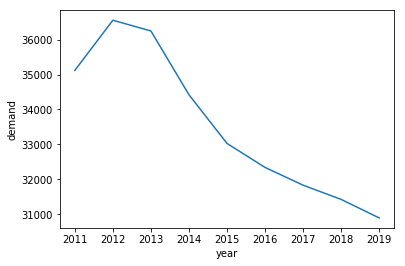

In [41]:
sns.lineplot(data=demand_data.reset_index(), x='year', y='demand')

In [42]:
mean_long_dat = pd.melt(mean_dat.drop(columns=['id','demand','frequency']).reset_index(), id_vars='year')
mean_long_dat.head()

,year,variable,value
0,2011,coal,11243.906907
1,2012,coal,15630.434915
2,2013,coal,14355.798134
3,2014,coal,11025.881341
4,2015,coal,8506.284996


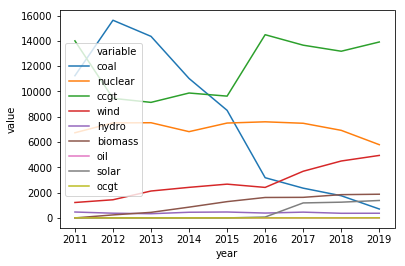

In [43]:
sns.lineplot(data=mean_long_dat, x='year', y='value', hue='variable')

mean_long_dat.to_csv('~/Documents/PhD/Projects/10-ELECSIM/elecsim/data/processed/electricity_mix/energy_mix_historical.csv')

In [44]:
hourly_dat = pd.read_csv('~/Documents/PhD/Projects/10-ELECSIM/test/test_new/demand_none-carbon_none-datetime_2019-07-08_18-26-06-capacity_52152.csv')
hourly_dat.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,hourly_accepted_bids,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted
0,0,418147.92,207262.82,88993.266144,76035.947905,3291.676233,217924.08,8577.225,"[{'plant_type': 'Recip_gas', 'segment_hours': ...",31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.614771e+10,78.67035,1342.506012


In [45]:
import yaml
extracted_dataframe = pd.DataFrame(yaml.load(hourly_dat.hourly_accepted_bids.iloc[0]))

In [46]:
extracted_dataframe.head()

,plant_type,segment_hours,capacity_bid
0,Recip_gas,55.0,523.8
1,Recip_gas,110.0,523.8
2,Recip_gas,165.0,523.8
3,Recip_gas,220.0,523.8
4,Recip_gas,275.0,523.8


In [47]:
mix = extracted_dataframe.groupby(['plant_type', 'segment_hours'])['capacity_bid'].sum().reset_index()

mix['plant_type'] = mix['plant_type'].replace("Biomass_meat","Biomass (Meat)")
mix['plant_type'] = mix['plant_type'].replace("Biomass_poultry_litter","Biomass (Poultry Litter)")
mix['plant_type'] = mix['plant_type'].replace("Biomass_straw","Biomass (Straw)")
mix['plant_type'] = mix['plant_type'].replace("Biomass_wood","Biomass (Wood)")

mix.head(30)

,plant_type,segment_hours,capacity_bid
0,Biomass (Meat),55.0,13.580
1,Biomass (Meat),110.0,13.580
2,Biomass (Meat),165.0,13.580
3,Biomass (Meat),220.0,13.580
4,Biomass (Meat),275.0,13.580
5,Biomass (Meat),330.0,13.580
6,Biomass (Meat),385.0,13.580
7,Biomass (Meat),440.0,13.580
8,Biomass (Meat),495.0,13.580
9,Biomass (Meat),550.0,13.580


In [48]:
import numpy as np
mix_ontop = mix.groupby("segment_hours").apply(lambda x: x.groupby('plant_type').apply(lambda x: x.reset_index()['capacity_bid']).cumsum()).reset_index()
mix_ontop

capacity_bid,segment_hours,plant_type,0
0,55.0,Biomass (Meat),13.580000
1,55.0,Biomass (Poultry Litter),79.831000
2,55.0,Biomass (Straw),116.691000
3,55.0,Biomass (Wood),2251.661000
4,55.0,CCGT,25201.001000
...,...,...,...
283,1320.0,Hydro,14688.819592
284,1320.0,Nuclear,23768.989592
285,1320.0,Offshore,28052.957269
286,1320.0,Onshore,33389.802287


In [49]:
def assign_index(x):
    try:
        x['order'] = np.array(['18', '17', '19', '20', '16', '12', '11', '10', '13', '14', '9', '15',
       '8', '21', '22', '7', '23', '0', '1', '6', '2', '3', '4', '5'])
        x['order'] = pd.to_numeric(x['order'])
        return x
    except:
        pass


mix_reordered = mix_ontop.groupby('plant_type').apply(lambda x: assign_index(x))
# mix_reordered.sort_values(by='order')
mix_reordered.head()



capacity_bid       segment_hours      plant_type      0  order
plant_type                                                    
Biomass (Meat) 0            55.0  Biomass (Meat)  13.58     18
               15          110.0  Biomass (Meat)  13.58     17
               28          165.0  Biomass (Meat)  13.58     19
               41          220.0  Biomass (Meat)  13.58     20
               55          275.0  Biomass (Meat)  13.58     16

Text(0, 0.5, 'Cumulative Electricity Generation (MW)')

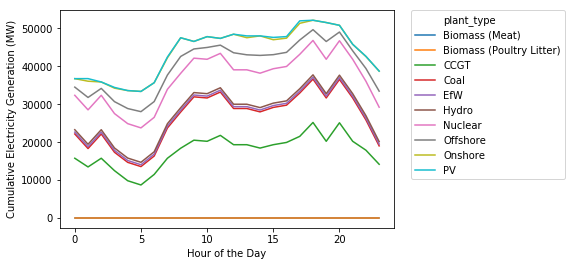

In [50]:
sns.lineplot(data=mix_reordered, x='order', y=0, hue='plant_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Hour of the Day')
plt.ylabel("Cumulative Electricity Generation (MW)")

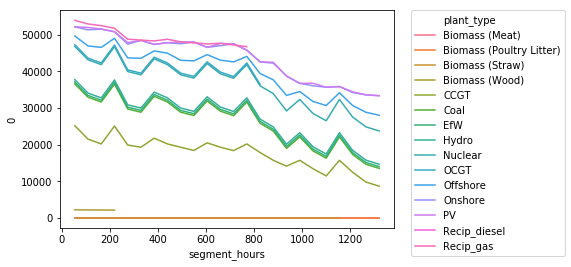

In [51]:
sns.lineplot(data = mix_ontop, x='segment_hours', y=0, hue='plant_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

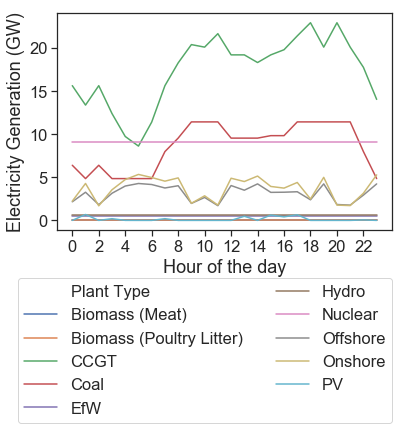

In [61]:
mix_reordered_not_ontop = mix.groupby('plant_type').apply(lambda x: assign_index(x))

# sns.lineplot(data=mix_reordered_not_ontop, x='segment_hours', y="capacity_bid", hue="plant_type")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
mix_reordered_not_ontop.capacity_bid = mix_reordered_not_ontop.capacity_bid/1000

mix_reordered_not_ontop = mix_reordered_not_ontop.rename(columns={"plant_type":"Plant Type"})
sns.set(font_scale=1.5)
sns.set_style("ticks")
g=sns.lineplot(data=mix_reordered_not_ontop, x='order', y="capacity_bid", hue='Plant Type')
plt.xlabel('Hour of the day')
plt.ylabel("Electricity Generation (GW)")
lgd = plt.legend(bbox_to_anchor=(1,-0.22), borderaxespad=0., ncol=2)

# lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set_xticks(list(range(0,24,2)))
plt.savefig('/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity/reports/figures/clusters_results_single_day.pdf', dpi=500, bbox_extra_artists=(lgd,), bbox_inches='tight')



In [53]:
mix_reordered_not_ontop

Plant Type  segment_hours  capacity_bid  order
plant_type                                                            
Biomass (Meat) 0    Biomass (Meat)           55.0     13.580000     18
               1    Biomass (Meat)          110.0     13.580000     17
               2    Biomass (Meat)          165.0     13.580000     19
               3    Biomass (Meat)          220.0     13.580000     20
               4    Biomass (Meat)          275.0     13.580000     16
...                            ...            ...           ...    ...
PV             271              PV         1100.0      0.000000      6
               272              PV         1155.0      0.000000      2
               273              PV         1210.0    196.949385      3
               274              PV         1265.0      3.024820      4
               275              PV         1320.0      0.000000      5

[240 rows x 4 columns]

In [54]:
ten_year = pd.read_csv('~/Documents/PhD/Projects/10-ELECSIM/test/test_new/demand_none-carbon_none-datetime_2019-07-09_09-39-45-capacity_52152.csv')
ten_year


,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted
0,0,442729.44,177471.13,88993.266144,76035.947905,3.291676e+03,217924.08,13432.075,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.723127e+10,81.482356,1336.756105
1,1,191727.60,78941.54,100898.866442,82930.634617,1.139483e+04,217924.08,0.000,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.189050e+10,58.323130,565.357022
2,2,354648.96,171973.52,78216.415445,65331.004670,5.683637e+03,217924.08,3854.295,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.904272e+10,65.969276,1121.432794
3,3,225299.04,179174.37,85862.339992,79367.849047,7.768074e+03,217924.08,0.000,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.234831e+10,58.477654,857.166382
4,4,427831.20,195733.56,87923.852784,76035.947905,3.291676e+03,217924.08,9224.700,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,-1.847036e+10,84.955530,1338.722457
5,5,232524.96,37540.80,99686.385987,82930.634617,1.139483e+04,217924.08,0.000,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,-2.017361e+10,61.397422,555.794135
6,6,357814.08,173948.52,77276.505233,65331.004670,5.683637e+03,217924.08,4549.300,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,-4.804522e+09,69.966683,1132.940528
7,7,341370.72,64879.54,84830.550313,79367.849047,7.768074e+03,217924.08,0.000,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,1.215165e+09,65.967984,841.404106
8,8,423726.48,197206.91,87660.767056,76035.947905,3.291676e+03,217924.08,7798.800,31912.0,14475.0,8729.9,6983.8,3377.8,9361.0,670.0,23.62,2.893048e+10,84.449291,1329.858758
9,9,196551.00,70607.04,99388.104411,82930.634617,1.139483e+04,217924.08,0.000,31912.0,14475.0,8729.9,6983.8,3377.8,9361.0,670.0,23.62,2.843817e+10,60.594222,556.550938
